In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/SEER Breast Cancer Dataset.csv')

In [ ]:
df.head(10)

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
5,49,White,Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,32,Positive,Positive,20,11,3,Alive
6,64,White,Single (never married),NaN,T2,N1,IIB,Moderately differentiated; Grade II,Regional,22,Positive,Positive,1,1,3,Dead
7,55,White,Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,15,Positive,Positive,9,1,3,Alive
8,59,White,Single (never married),NaN,T3,N1,IIIA,Moderately differentiated; Grade II,Regional,70,Positive,Positive,9,1,4,Dead
9,67,White,Married (including common law),NaN,T3,N2,IIIA,Poorly differentiated; Grade III,Regional,55,Positive,Positive,9,9,4,Dead


In [ ]:
df.shape

(4024, 16)

In [ ]:
df.columns

Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(10)

Unnamed: 3        4024
Age                  0
Race                 0
Marital Status       0
T Stage              0
N Stage              0
6th Stage            0
Grade                0
A Stage              0
Tumor Size           0
dtype: int64

In [ ]:
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(10)

,Total,Percent
Unnamed: 3,4024,1.0
Age,0,0.0
Race,0,0.0
Marital Status,0,0.0
T Stage,0,0.0
N Stage,0,0.0
6th Stage,0,0.0
Grade,0,0.0
A Stage,0,0.0
Tumor Size,0,0.0


In [ ]:
df.drop(["Unnamed: 3"], axis = 1, inplace = True)


In [ ]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married (including common law),T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive


In [ ]:
df.shape

(4024, 15)

In [ ]:
df.isnull()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4020,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4021,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4022,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
def encodeColumn(parameter):
    df[parameter] = encoder.fit_transform(df[parameter])

listColumn = ['Race ','Marital Status','T Stage ','N Stage','6th Stage','Grade','A Stage', 'Estrogen Status','Progesterone Status','Status']
for i in listColumn:
    encodeColumn(i)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int64
 2   Marital Status          4024 non-null   int64
 3   T Stage                 4024 non-null   int64
 4   N Stage                 4024 non-null   int64
 5   6th Stage               4024 non-null   int64
 6   Grade                   4024 non-null   int64
 7   A Stage                 4024 non-null   int64
 8   Tumor Size              4024 non-null   int64
 9   Estrogen Status         4024 non-null   int64
 10  Progesterone Status     4024 non-null   int64
 11  Regional Node Examined  4024 non-null   int64
 12  Reginol Node Positive   4024 non-null   int64
 13  Survival Months         4024 non-null   int64
 14  Status                  4024 non-null   int64
dtypes: int64(15)
memory u

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df)

print(normalized_data)


[[0.33333333 0.5        0.25       ... 0.22222222 0.         0.        ]
 [0.43589744 0.5        0.25       ... 0.17777778 0.00943396 0.        ]
 [0.94871795 1.         0.25       ... 0.         0.00943396 1.        ]
 ...
 [0.58974359 1.         0.         ... 0.02222222 1.         0.        ]
 [0.76923077 0.5        0.25       ... 0.02222222 1.         0.        ]
 [0.82051282 1.         0.         ... 0.         1.         0.        ]]


In [ ]:
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print(normalized_df)

           Age  Race   Marital Status  T Stage   N Stage  6th Stage     Grade  \
0     0.333333    0.5            0.25  0.333333      1.0       1.00  0.000000   
1     0.435897    0.5            0.25  0.333333      0.5       0.50  0.000000   
2     0.948718    1.0            0.25  0.333333      0.0       0.25  0.333333   
3     0.410256    1.0            0.00  0.000000      0.0       0.00  0.000000   
4     0.846154    1.0            0.25  0.333333      0.5       0.50  0.000000   
...        ...    ...             ...       ...      ...        ...       ...   
4019  0.564103    1.0            0.25  0.000000      0.0       0.00  1.000000   
4020  0.589744    1.0            0.25  0.000000      0.5       0.50  0.333333   
4021  0.589744    1.0            0.00  0.000000      0.0       0.00  0.000000   
4022  0.769231    0.5            0.25  0.000000      0.0       0.00  0.000000   
4023  0.820513    1.0            0.00  0.000000      0.0       0.00  0.000000   

      A Stage  Tumor Size  

In [ ]:
df.describe()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,1.775845,1.371272,0.784791,0.438370,1.321819,0.690358,0.977137,30.473658,0.933151,0.826541,14.357107,4.158052,71.297962,0.153082
std,8.963134,0.564465,1.063637,0.765531,0.693479,1.266624,1.016418,0.149485,21.119696,0.249791,0.378691,8.099675,5.109331,22.921430,0.360111
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,47.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000,1.000000,1.000000,9.000000,1.000000,56.000000,0.000000
50%,54.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,25.000000,1.000000,1.000000,14.000000,2.000000,73.000000,0.000000
75%,61.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,38.000000,1.000000,1.000000,19.000000,5.000000,90.000000,0.000000
max,69.000000,2.000000,4.000000,3.000000,2.000000,4.000000,3.000000,1.000000,140.000000,1.000000,1.000000,61.000000,46.000000,107.000000,1.000000


Data Visualization

In [ ]:
#plt.rcParams['font.size']= 10
#sns.pairplot(df,hue='Status', palette='Blues')

Distribution of ages of woman with breast cancer


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Ages of Womans with Breast Cancer')

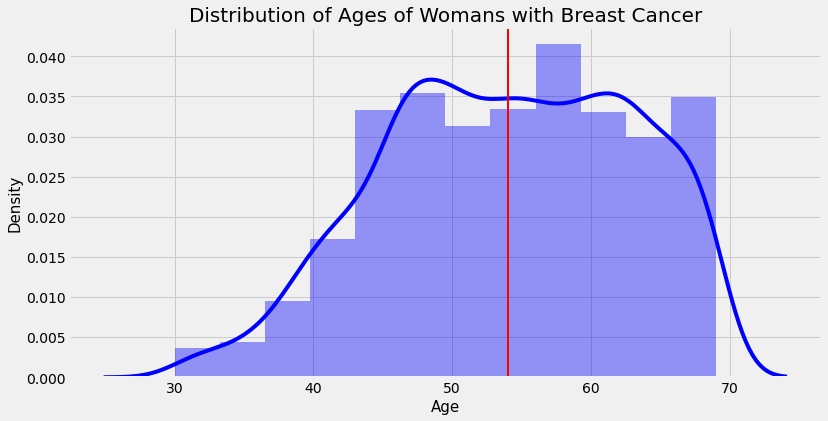

In [ ]:
plt.figure(figsize=(12,6))
median_age = df.Age.median()
sns.distplot(df.Age, color= 'b', kde =True, bins=12)
plt.axvline(median_age
            ,color='red',linewidth=2,label='Median Age')
plt.xlabel('Age',fontdict={'fontsize':15})
plt.ylabel('Density',fontdict={'fontsize':15})
plt.title("Distribution of Ages of Womans with Breast Cancer",fontdict={'fontsize':20})

In [ ]:
df.columns

Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [ ]:
df.Status.unique()

array([0, 1])

In [ ]:
df.Grade.unique()

array([0, 1, 3, 2])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Size of the Tumour based on Grade')

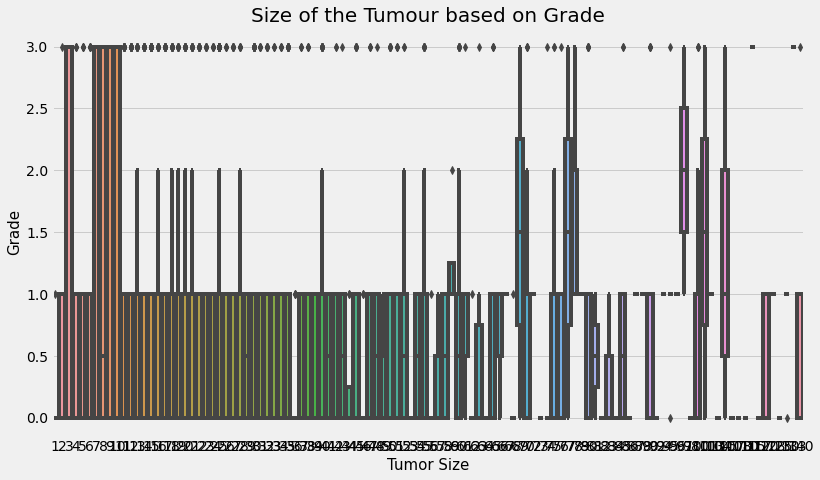

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot('Tumor Size','Grade', data=df)
plt.xlabel('Tumor Size',fontdict={'fontsize':15})
plt.ylabel('Grade',fontdict={'fontsize':15})
plt.title("Size of the Tumour based on Grade",fontdict={'fontsize':20})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Progesterone status for different Grade of Breast Cancer')

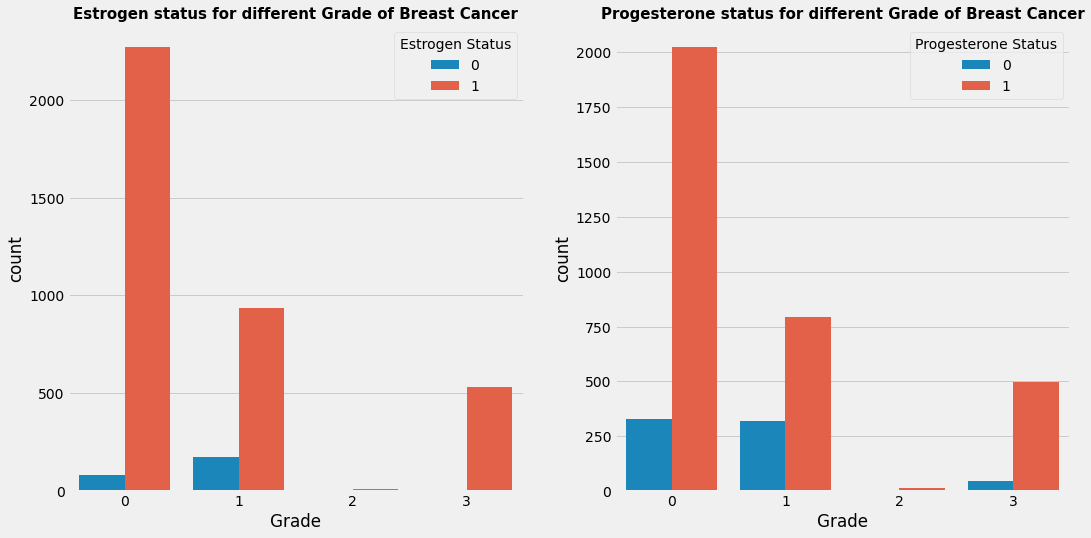

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(16,8))

sns.countplot(df.Grade, hue=df['Estrogen Status'],ax=axes[0])
axes[0].set_title("Estrogen status for different Grade of Breast Cancer",
                  fontweight="bold",fontdict={'fontsize': 15})
sns.countplot(df.Grade, hue=df['Progesterone Status'],ax=axes[1])
axes[1].set_title("Progesterone status for different Grade of Breast Cancer",fontweight="bold",fontdict={'fontsize': 15})

Text(0.5, 1.0, 'Tumor Sizes for different Ages and Survival Month')

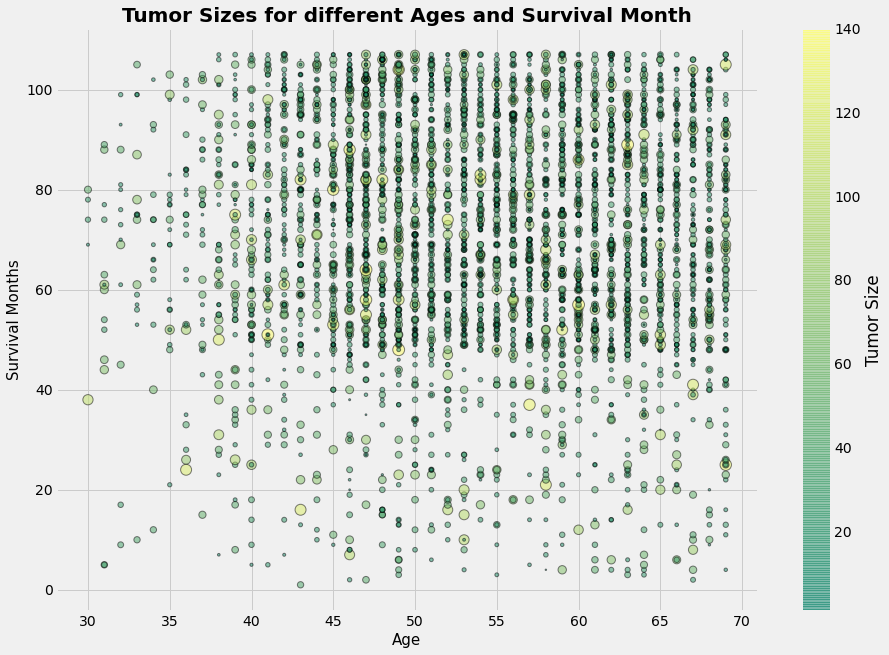

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,10))
plt.scatter(df.Age,df['Survival Months'],s=df['Tumor Size'],c=df['Tumor Size'],edgecolor='k',
            cmap='summer',alpha=0.50,linewidth=1)
plt.colorbar().set_label('Tumor Size')
plt.xlabel("Age",fontdict={'fontsize': 15})
plt.ylabel("Survival Months",fontdict={'fontsize': 15})
plt.title("Tumor Sizes for different Ages and Survival Month",fontdict={'fontsize': 20},
          fontweight="bold")

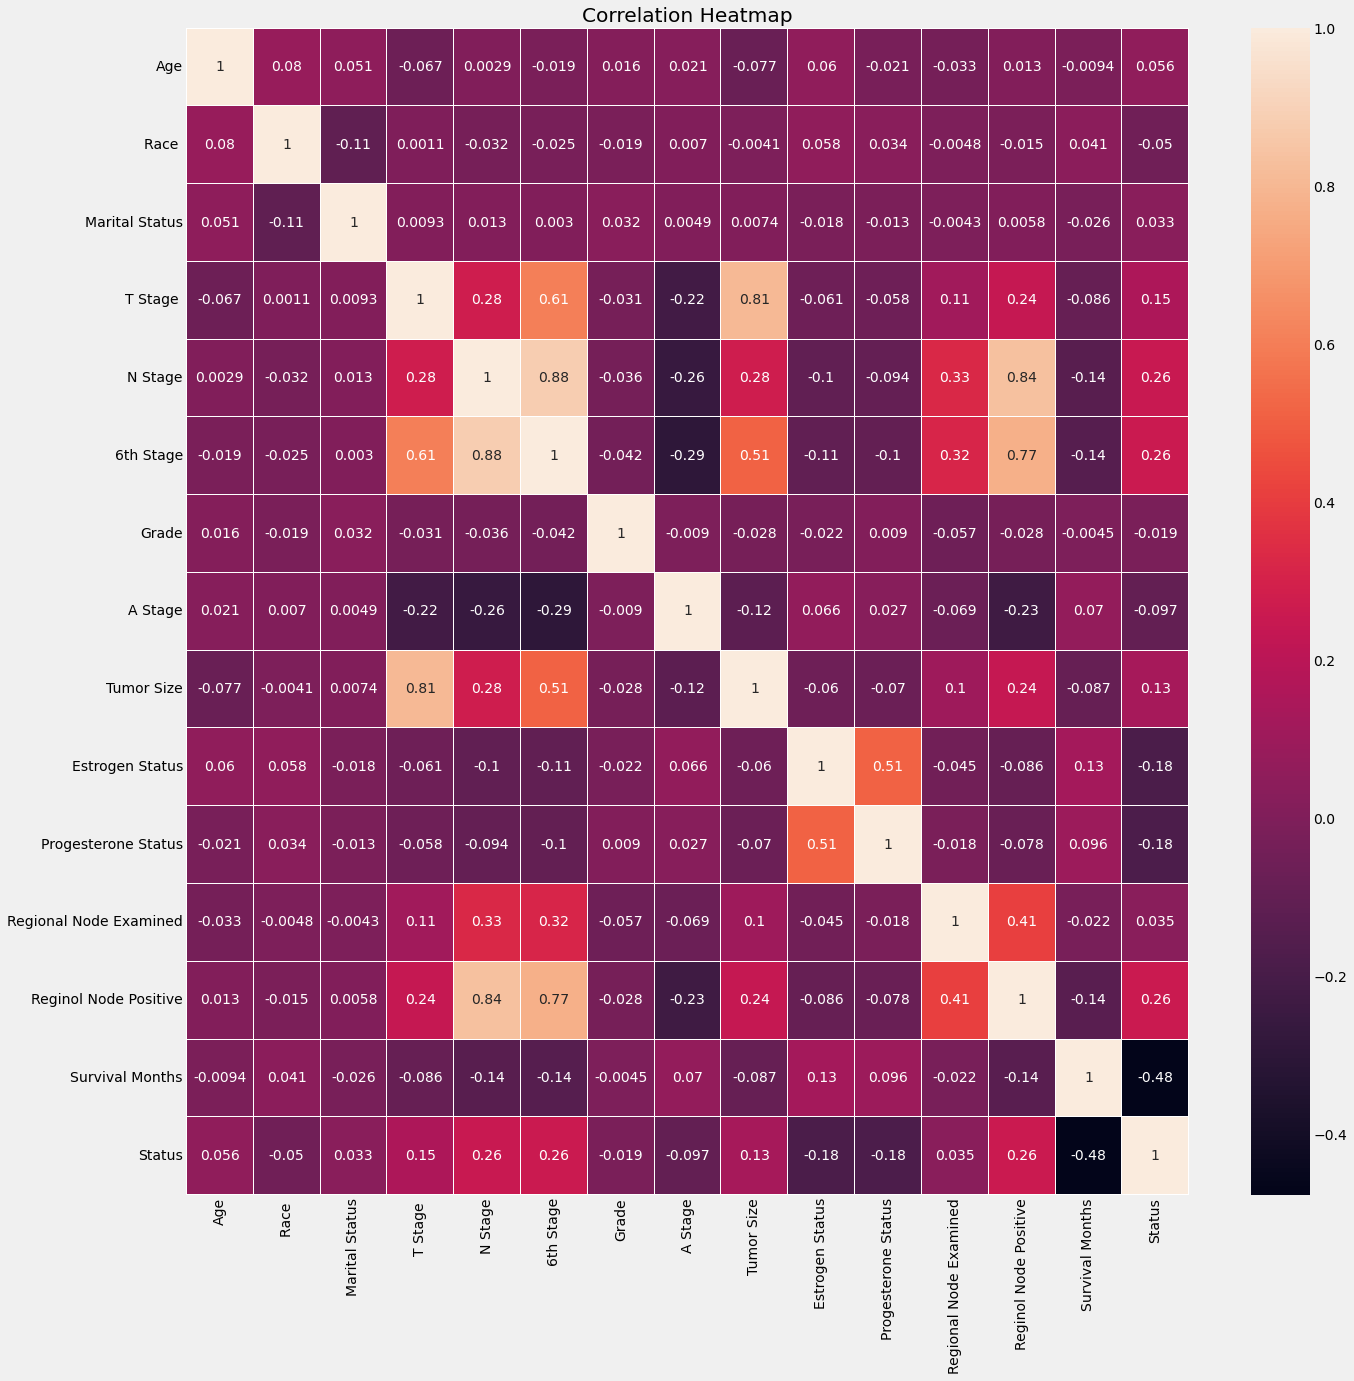

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot=True, cmap = 'rocket', linewidth = 0.01)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.head()


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,1,1,1,2,4,0,1,40,1,1,19,11,1,0
1,47,1,1,1,1,2,0,1,45,1,1,25,9,2,0
2,67,2,1,1,0,1,1,1,25,1,1,4,1,2,1
3,46,2,0,0,0,0,0,1,19,1,1,26,1,2,1
4,63,2,1,1,1,2,0,1,35,1,1,21,5,3,1


In [ ]:
x=df.drop(['Status'], axis=1)
y=df['Status']
y

0       0
1       0
2       1
3       1
4       1
       ..
4019    0
4020    0
4021    0
4022    0
4023    0
Name: Status, Length: 4024, dtype: int64

Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
conf1 = confusion_matrix(y_test, y_pred1)
print(conf1)

[[749 116]
 [ 72  69]]


In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       865
           1       0.37      0.49      0.42       141

    accuracy                           0.81      1006
   macro avg       0.64      0.68      0.66      1006
weighted avg       0.84      0.81      0.82      1006



In [ ]:
y_pred1 = gnb.predict(x_test)

In [ ]:
print(gnb.score(x_test,y_test))

0.8131212723658051


Using KNN

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
pred = knn.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
conf2 = confusion_matrix(y_test, y_pred)
print(conf2)

[[822  26]
 [ 87  71]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       848
           1       0.73      0.45      0.56       158

    accuracy                           0.89      1006
   macro avg       0.82      0.71      0.75      1006
weighted avg       0.88      0.89      0.88      1006



In [ ]:
knn.score(x_test,y_test)

0.8876739562624254

RandomForest

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=42)
x_train.shape, x_test.shape

((3018, 14), (1006, 14))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [ ]:
%%time
classifier_rf.fit(x_train, y_train)

CPU times: user 388 ms, sys: 32.2 ms, total: 421 ms
Wall time: 346 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
classifier_rf.fit(x_train,y_train)
y_pred2 = classifier_rf.predict(x_test)
conf3 = confusion_matrix(y_test, y_pred2)
print(conf3)

[[826  16]
 [ 85  79]]


In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       842
           1       0.83      0.48      0.61       164

    accuracy                           0.90      1006
   macro avg       0.87      0.73      0.78      1006
weighted avg       0.89      0.90      0.89      1006



In [ ]:
classifier_rf.oob_score_

0.903247183565275